In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Data/clean/playstation.csv")
data.head()

,post_id,text,post_text,time,likes,comments,shares,link,links,comments_full,...,post_time,like,reaction,like.1,love,haha,wow,care,sad,angry
0,730016209160819,NaN,NaN,2023-11-25 09:03:46,331,27,5,NaN,[{'link': '/story.php?story_fbid=8697658714805...,<generator object PostExtractor.extract_commen...,...,09:03:46,331,"{'like': 331, 'love': 80, 'haha': 8, 'wow': 1,...",331,80,8,1,3,1,2
1,729723005856806,PlayStation Plus Premium members can spend two...,PlayStation Plus Premium members can spend two...,2023-11-24 18:34:27,1672,645,100,http://play.st/46vrSBk?fbclid=IwAR3GOZbEQUh3Cm...,[{'link': 'https://lm.facebook.com/l.php?u=htt...,<generator object PostExtractor.extract_commen...,...,18:34:27,1672,"{'like': 1672, 'love': 286, 'haha': 184, 'wow'...",1672,286,184,36,11,2,7
2,728763929286047,Share of the Week dives into the rogues galler...,Share of the Week dives into the rogues galler...,2023-11-24 17:01:25,1301,55,140,http://play.st/3MWJW0b?fbclid=IwAR3RXfHAOiHHj0...,[{'link': '/hashtag/spiderman2ps5?refid=17&_ft...,<generator object PostExtractor.extract_commen...,...,17:01:25,1301,"{'like': 1301, 'love': 502, 'haha': 7, 'wow': ...",1301,502,7,6,14,0,1
3,729647439197696,Time to talk turkey.\n\nDig in to Black Friday...,Time to talk turkey.\n\nDig in to Black Friday...,2023-11-24 15:59:28,577,152,21,https://play.st/49PebQt?fbclid=IwAR2FKWq8ipoNM...,[{'link': 'https://lm.facebook.com/l.php?u=htt...,<generator object PostExtractor.extract_commen...,...,15:59:28,577,"{'like': 577, 'love': 50, 'haha': 89, 'wow': 1...",577,50,89,1,3,0,4
4,728960592599714,Which PlayStation Shape are you?\n\nプレイステーション ...,Which PlayStation Shape are you?,2023-11-23 09:10:01,232,46,27,https://play.st/49FJWvj?fbclid=IwAR0LHhqDX-250...,[{'link': '/story.php?story_fbid=pfbid02u9iyTX...,<generator object PostExtractor.extract_commen...,...,09:10:01,232,"{'like': 232, 'love': 43, 'haha': 8, 'wow': 6,...",232,43,8,6,3,0,1


## Read all post text

In [3]:
post = data[["post_id", "post_text", "text"]]
post

,post_id,post_text,text
0,730016209160819,NaN,NaN
1,729723005856806,PlayStation Plus Premium members can spend two...,PlayStation Plus Premium members can spend two...
2,728763929286047,Share of the Week dives into the rogues galler...,Share of the Week dives into the rogues galler...
3,729647439197696,Time to talk turkey.\n\nDig in to Black Friday...,Time to talk turkey.\n\nDig in to Black Friday...
4,728960592599714,Which PlayStation Shape are you?,Which PlayStation Shape are you?\n\nプレイステーション ...
...,...,...,...
544,10161442502256803,Perfect lightsaber parries to repel blaster fi...,Perfect lightsaber parries to repel blaster fi...
545,10161446959161803,Zipping into the weekend.,Zipping into the weekend.
546,10161447467776803,We’re seeing the effects of The Last on Us Par...,We’re seeing the effects of The Last on Us Par...
547,10161446954061803,"The galaxy is now more dangerous than ever, bu...","The galaxy is now more dangerous than ever, bu..."


## The time between the crawled post 

In [4]:
data["time"].min(), data["time"].max()

('2023-04-28 16:02:18', '2023-11-25 09:03:46')

## Statistic of the interaction of crawled posts

### Top 5 most reaction post

In [5]:
top_5_most_reaction_post = data.nlargest(5, columns="reaction_count")
top_5_most_reaction_post[["post_id", "post_text", "reaction_count"]]


,post_id,post_text,reaction_count
416,10161501636536803,A new hands-on highlights new areas of Final F...,70200
92,711635940998846,"Great news, Spidey fans -- Marvel's #SpiderMan...",34074
37,721724376656669,Looking good✨ #PS5,29162
80,714025857426521,Are your Spidey-Senses tingling? The Sphere ha...,22550
95,710161904479583,"In celebration of today’s launch, PlayStation ...",21580


### Top 5 least reaction post

In [6]:
top_5_least_reaction_post = data.nsmallest(5, columns="reaction_count")
top_5_least_reaction_post[["post_id", "post_text", "reaction_count"]]

,post_id,post_text,reaction_count
346,10161511975401803,🥊 🛏️ Bedman? is the newest addition to the Gui...,131
356,10161512043671803,Think you can hang with the best at Evo? Prove...,142
193,696002199228887,In the latest Accessibility Community Spotligh...,145
274,10161541822091803,Want to compete in Guilty Gear -Strive- tourna...,152
302,10161527497646803,🏈 Not sure how to build a tournament-ready MUT...,162


### Describe of the interaction

In [7]:
interaction = ["reaction_count", "comments", "shares", "like"]
data[interaction].describe()

,reaction_count,comments,shares,like
count,549.000000,549.000000,549.000000,549.000000
mean,2084.249545,233.442623,173.766849,1479.051002
std,4436.428192,432.614323,462.121793,2516.256104
min,131.000000,2.000000,4.000000,111.000000
25%,460.000000,37.000000,22.000000,384.000000
50%,904.000000,95.000000,47.000000,713.000000
75%,1935.000000,256.000000,109.000000,1496.000000
max,70200.000000,4500.000000,5100.000000,24605.000000


## Statistic about post everyday per week

### Number of posts on weekday

In [9]:
Weekdays = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data['time'] = pd.to_datetime(data['time'])
data['Weekday'] = data['time'].dt.weekday
posts_per_day = data['Weekday'].value_counts().sort_index().rename(index=Weekdays)
posts_per_day

Weekday
Monday        46
Tuesday       90
Wednesday     99
Thursday      99
Friday       120
Saturday      51
Sunday        44
Name: count, dtype: int64

Text(0, 0.5, 'Number of post')

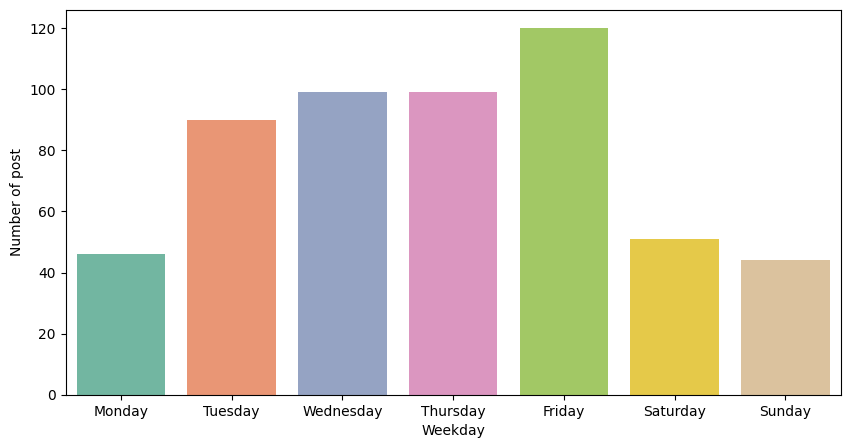

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(x=posts_per_day.index, y=posts_per_day.values, hue=posts_per_day.index, palette="Set2")
plt.xlabel(xlabel="Weekday")
plt.ylabel(ylabel="Number of post")

### Average reaction on weekday

Text(0, 0.5, 'Average number of reaction')

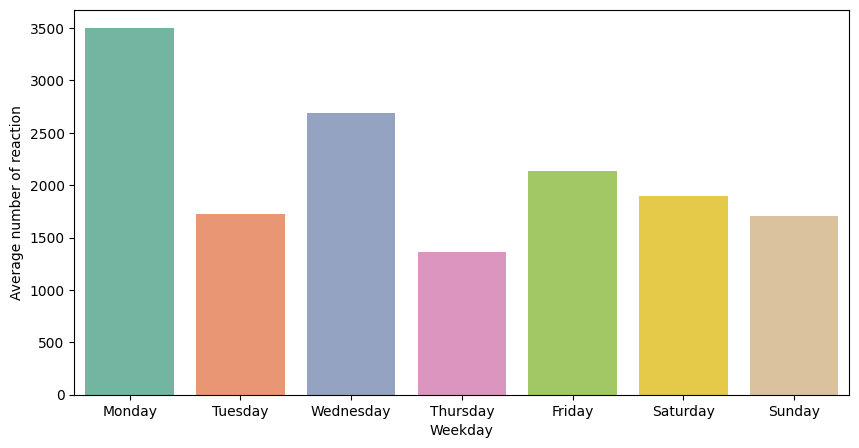

In [41]:
avg_reaction_per_day = data.groupby('Weekday')['reaction_count'].mean().sort_index()
avg_reaction_per_day.rename(index=Weekdays, inplace=True)
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_reaction_per_day.index, 
            y=avg_reaction_per_day.values, 
            hue=avg_reaction_per_day.index,
            palette="Set2")
plt.xlabel('Weekday')
plt.ylabel('Average number of reaction')


### Average comment on weekday

Text(0, 0.5, 'Average number of comment')

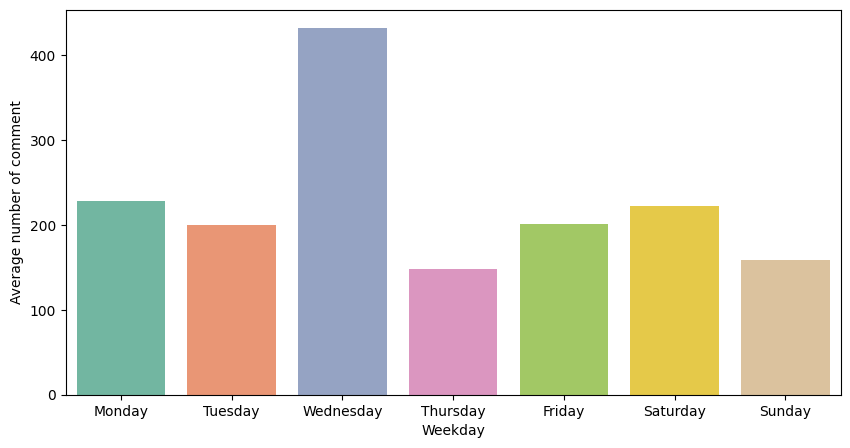

In [42]:
avg_comment_per_day = data.groupby('Weekday')['comments'].mean().sort_index()
avg_comment_per_day.rename(index=Weekdays, inplace=True)
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_comment_per_day.index, 
            y=avg_comment_per_day.values, 
            hue=avg_comment_per_day.index,
            palette="Set2")
plt.xlabel('Weekday')
plt.ylabel('Average number of comment')

### Average share on weekday

Text(0, 0.5, 'Average number of shares')

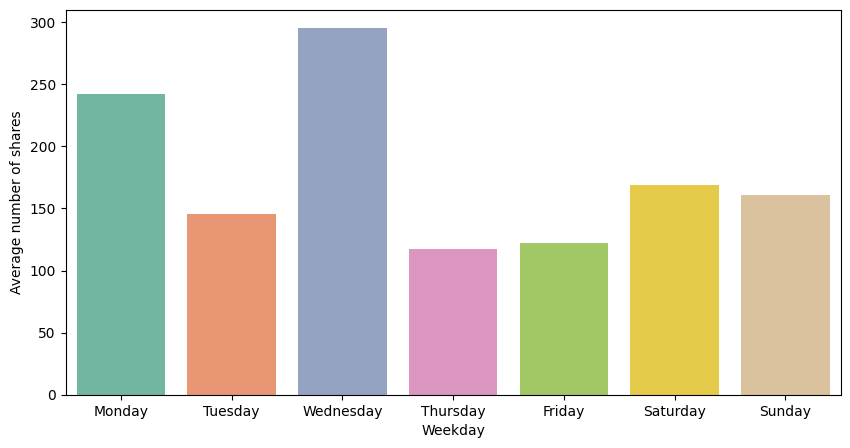

In [43]:
avg_share_per_day = data.groupby('Weekday')['shares'].mean().sort_index()
avg_share_per_day.rename(index=Weekdays, inplace=True)
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_share_per_day.index, 
            y=avg_share_per_day.values, 
            hue=avg_share_per_day.index,
            palette="Set2")
plt.xlabel('Weekday')
plt.ylabel('Average number of shares')

## Statistic about post time

### Post per hour 

Text(0, 0.5, 'Number of post')

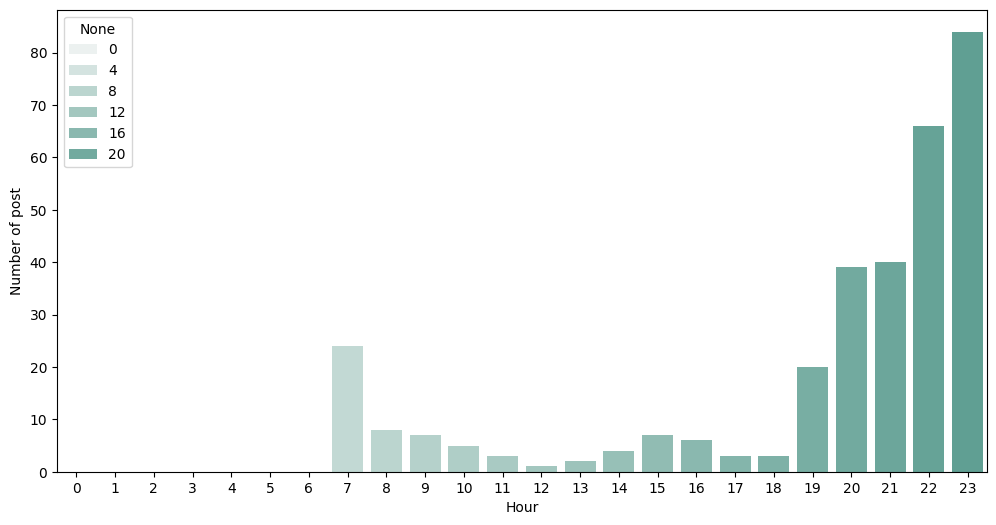

In [37]:
data['post_per_hour'] = data['time'].dt.hour + 7 #GMT +7
posts_per_hour = data['post_per_hour'].value_counts().sort_index()
all_hours = pd.Index(range(24))
posts_per_hour = posts_per_hour.reindex(all_hours, fill_value=0)
plt.figure(figsize=(12, 6));
sns.barplot(x=posts_per_hour.index, y=posts_per_hour.values, hue=posts_per_hour.index, palette="light:#5A9")
plt.xlabel('Hour');
plt.ylabel('Number of post')

### Average reaction of posts per hour

Text(0.5, 0, 'Hour')

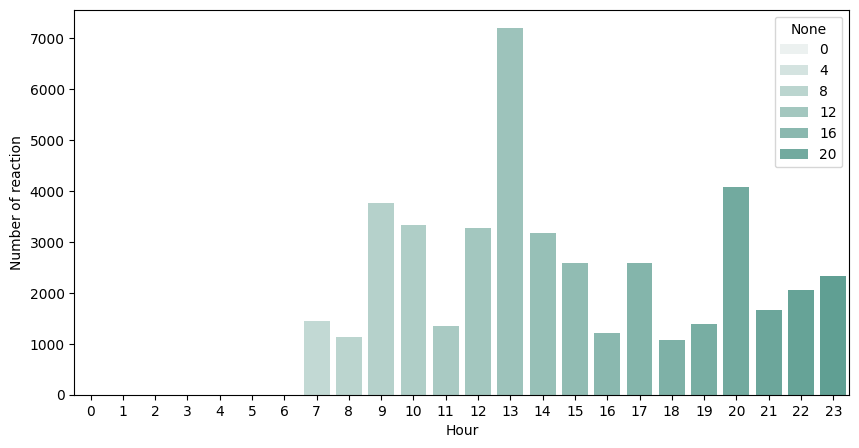

In [39]:
avg_reaction_per_hour = data.groupby('post_per_hour')['reaction_count'].mean().sort_index()
avg_reaction_per_hour = avg_reaction_per_hour.reindex(all_hours, fill_value=0)
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_reaction_per_hour.index, 
            y=avg_reaction_per_hour.values, 
            hue=avg_reaction_per_hour.index, palette="light:#5A9")
plt.ylabel('Number of reaction')
plt.xlabel('Hour')

### Average comment of posts per hour

Text(0.5, 0, 'Hour')

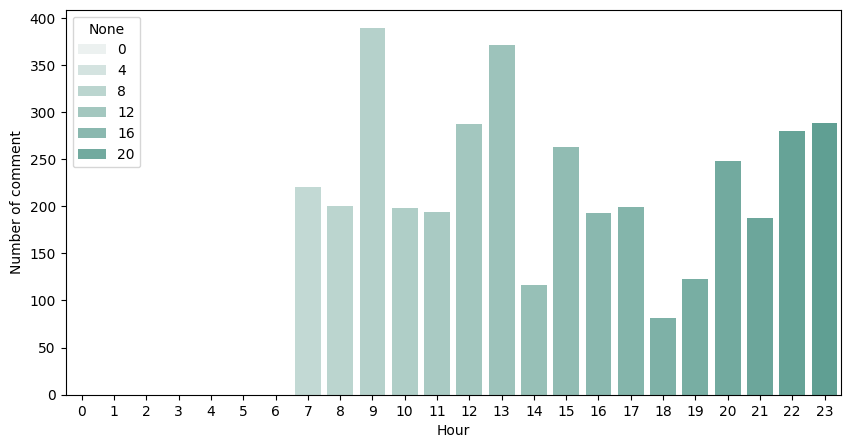

In [38]:
avg_comment_per_hour = data.groupby('post_per_hour')['comments'].mean().sort_index()
avg_comment_per_hour = avg_comment_per_hour.reindex(all_hours, fill_value=0)
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_comment_per_hour.index, 
            y=avg_comment_per_hour.values, 
            hue=avg_comment_per_hour.index,
            palette="light:#5A9")
plt.ylabel('Number of comment')
plt.xlabel('Hour')

### Average share of posts per hour

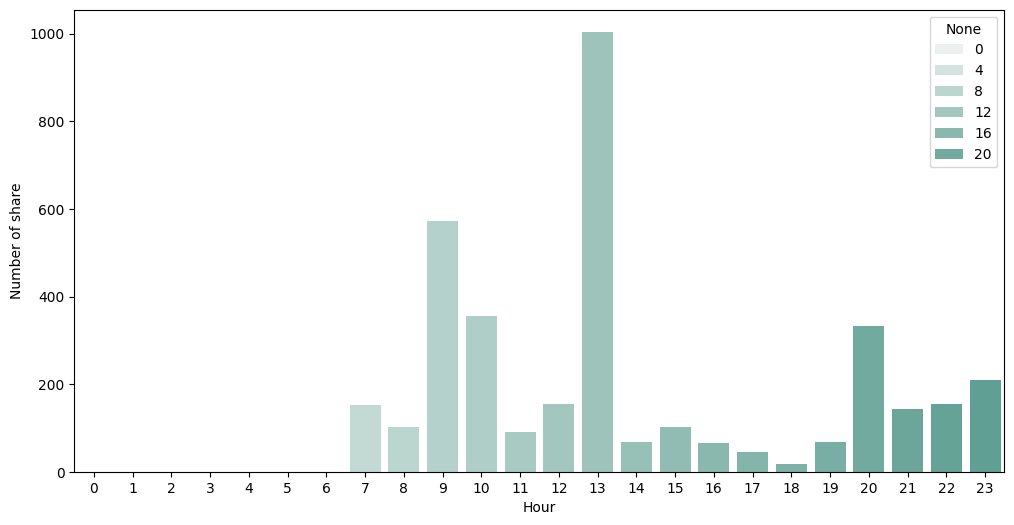

In [44]:
avg_share_per_hour = data.groupby('post_per_hour')['shares'].mean().sort_index()
avg_share_per_hour = avg_share_per_hour.reindex(all_hours, fill_value=0)
plt.figure(figsize=(12, 6));
sns.barplot(x=avg_share_per_hour.index, 
            y=avg_share_per_hour.values, 
            hue=avg_share_per_hour.index,
            palette="light:#5A9"
            )
plt.ylabel('Number of share')
plt.xlabel('Hour');

## Distribution of interaction

### Reaction

Text(0, 0.5, 'Frequency')

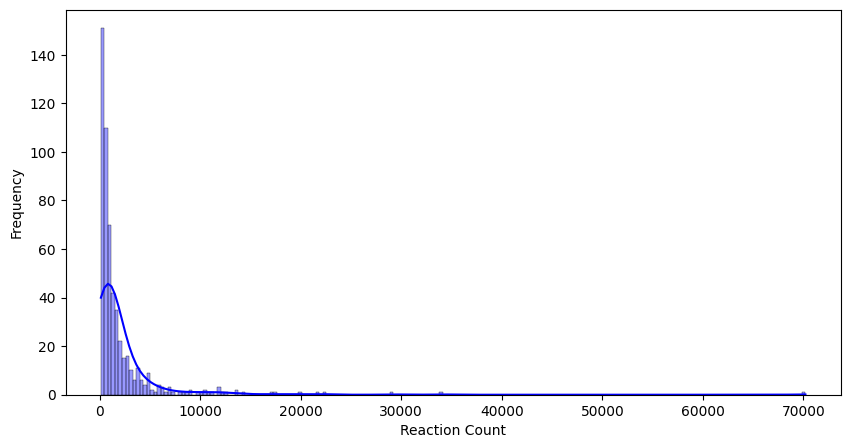

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(data["reaction_count"], kde=True, alpha=0.4, bins=200, color="blue", edgecolor="black")
plt.xlabel("Reaction Count")
plt.ylabel("Frequency")


### Comment

Text(0, 0.5, 'Frequency')

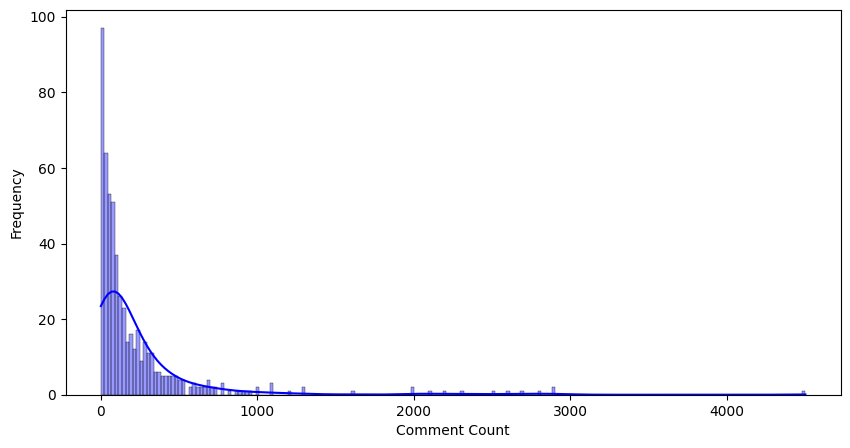

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data["comments"], kde=True, alpha=0.4, bins=200, color="blue", edgecolor="black")
plt.xlabel("Comment Count")
plt.ylabel("Frequency")


### Share

Text(0, 0.5, 'Frequency')

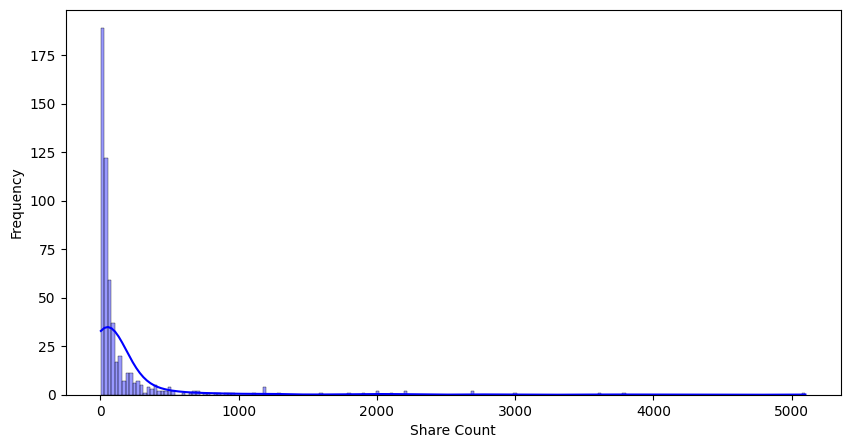

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data["shares"], kde=True, alpha=0.4, bins=200, color="blue", edgecolor="black")
plt.xlabel("Share Count")
plt.ylabel("Frequency")


### Probability distribution of the number of reaction

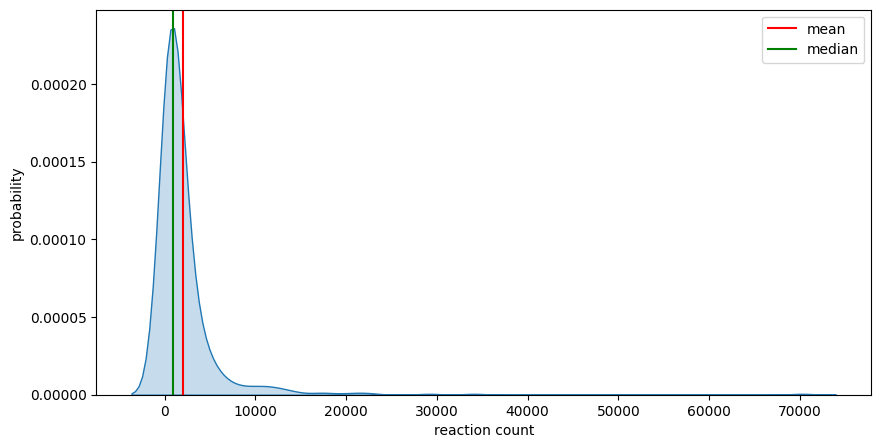

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data["reaction_count"], fill=True)
plt.axvline(data["reaction_count"].mean(), color="red", label="mean")
plt.axvline(data["reaction_count"].median(), color="green", label="median")
plt.xlabel("reaction count")
plt.ylabel("probability")
plt.legend()

## The relation between number of reactions with number of comments, shares

### Heatmap

<Axes: >

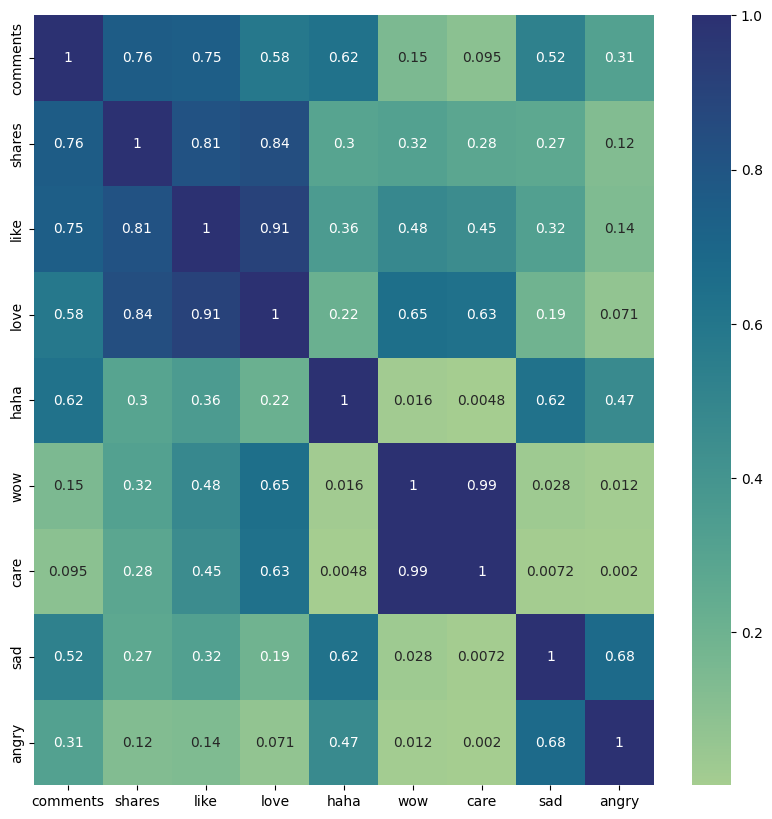

In [49]:
corr = data[['comments', 'shares', 'like', 'love', 'haha', 'wow', 'care', 'sad', 'angry']].corr()
plt.figure(figsize=(10, 10));
sns.heatmap(corr, annot=True, cmap="crest")


### Pairplot

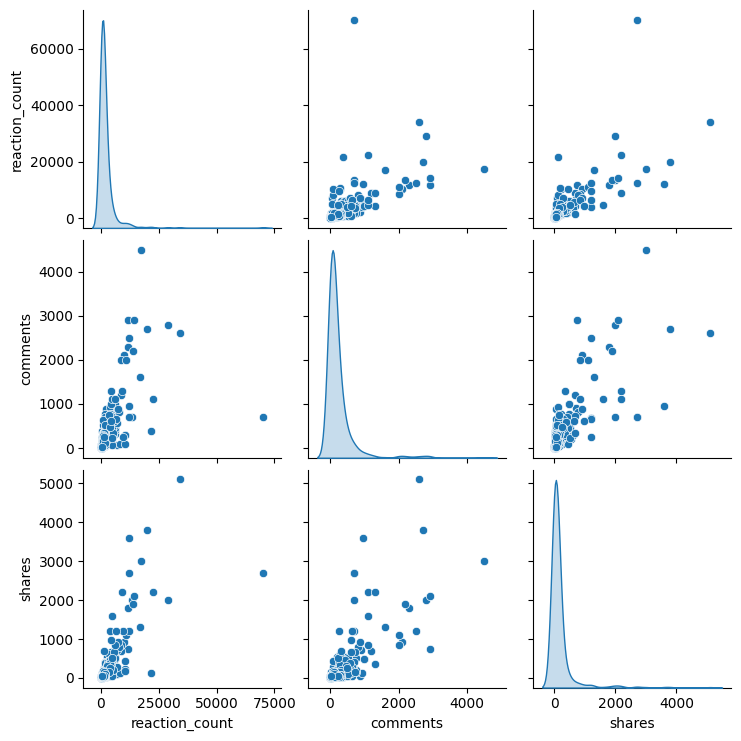

In [33]:
sns.pairplot(data[['reaction_count', 'comments', 'shares']], diag_kind='kde');


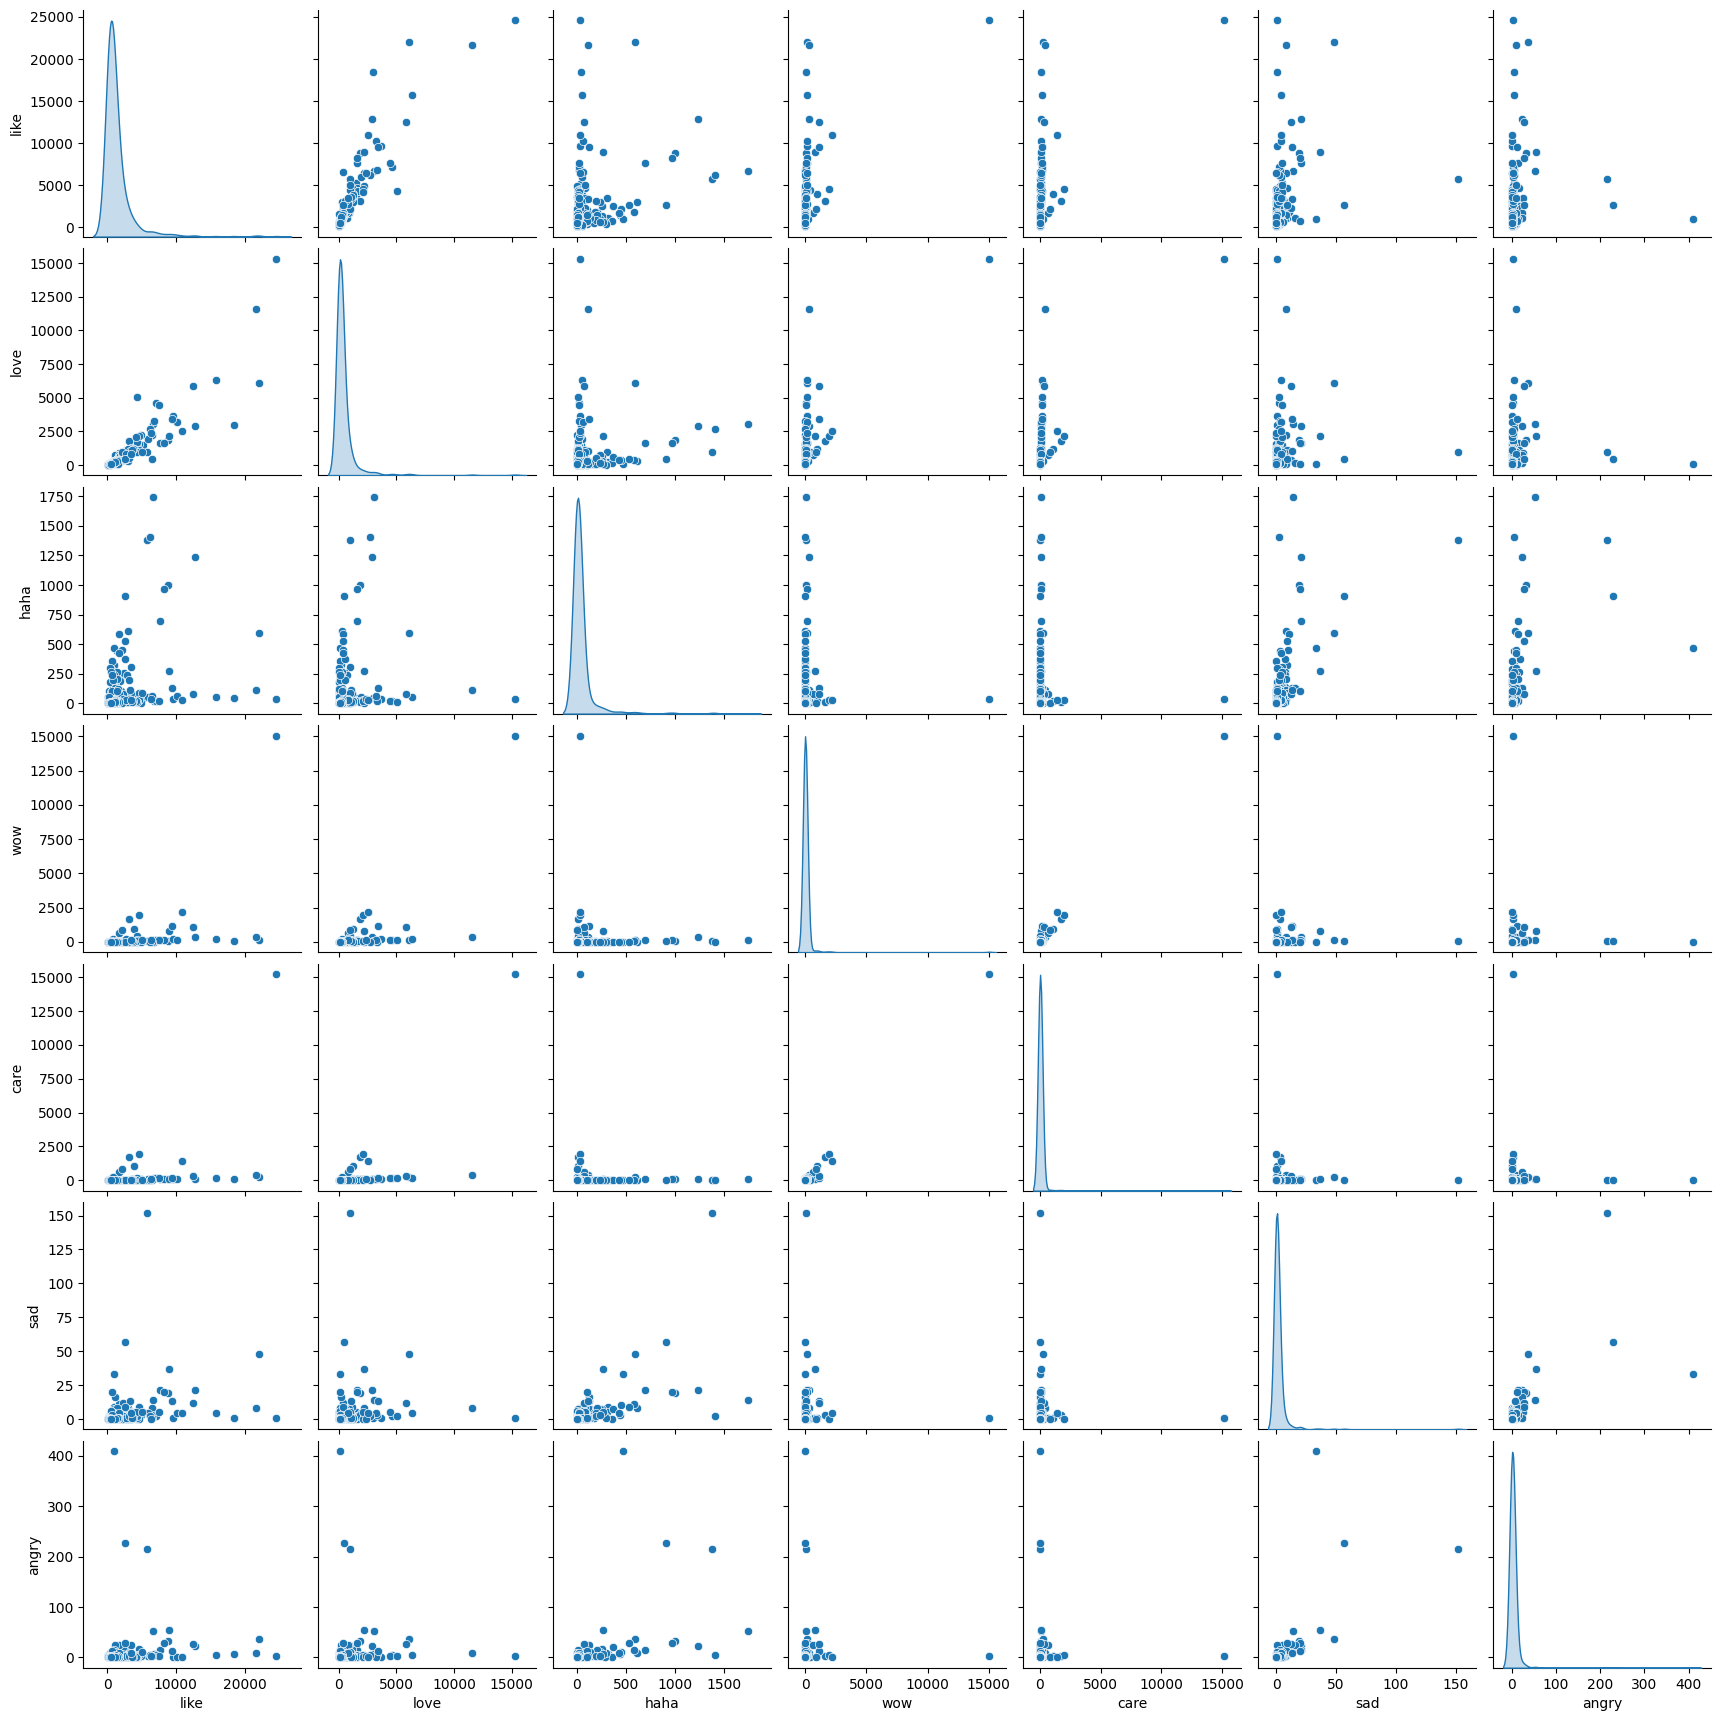

In [34]:
sns.pairplot(data[['like', 'love', 'haha', 'wow', 'care', 'sad', 'angry']], diag_kind='kde');


## WordCloud

In [ ]:
post.fillna("[]")

text = ""
for txt in post["text"]:
    try:
        text = text + txt
    except:
        text = text

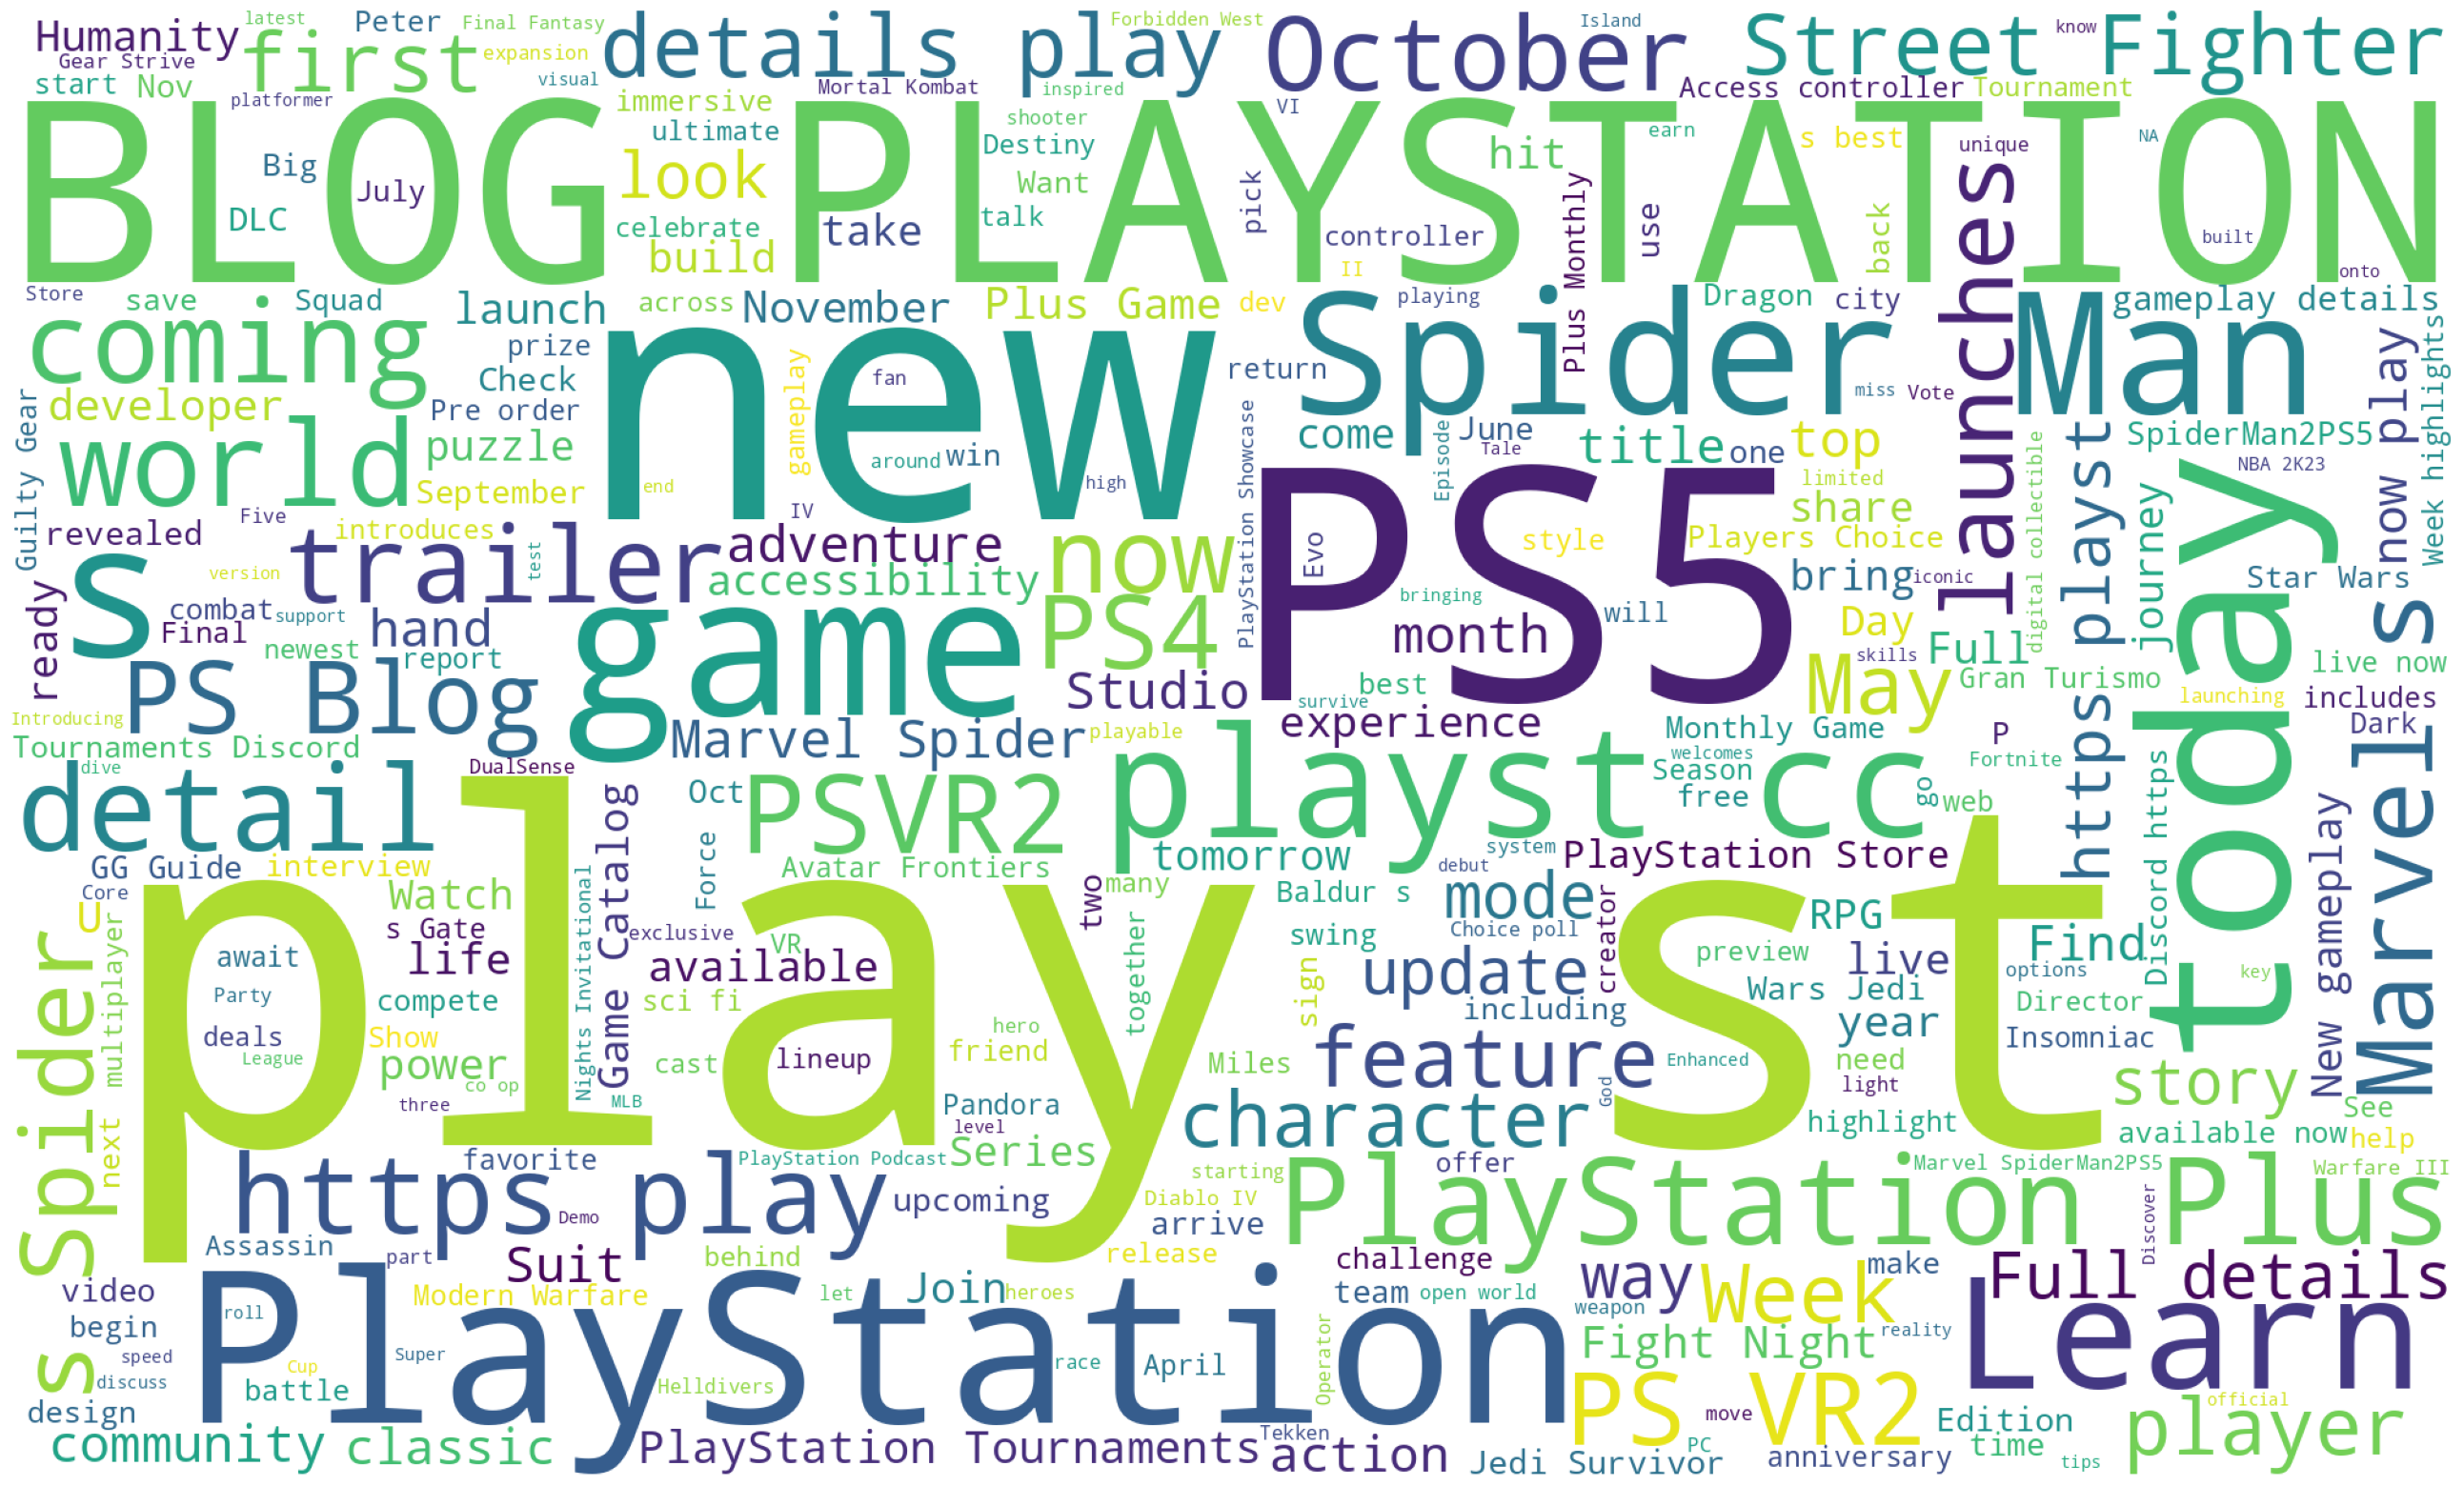

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()